<div style="width: 100%; height: 100px; background-color: #EEC6D8; border: 3px solid #39B1A1; text-align: center; line-height: 100px; color: #3CA1D5; font-size: 24px; font-weight: bold; border-radius:6px;">
Anime Character Generation using GAN
</div>

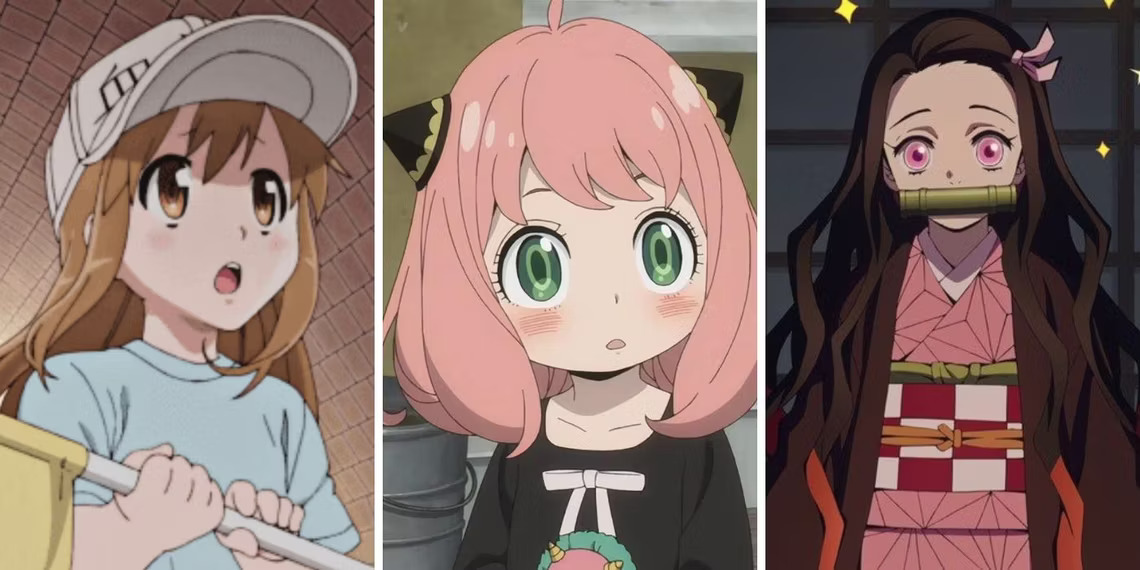

<div style="width: 100%;  color: black; padding: 20px; border: 3px solid #39B1A1; margin-bottom: 20px; border-radius: 10px;">
    <h3 style="color: #3CA1D5;">Introduction</h3>
    <span>
    Welcome to the "Anime Character Generation using GAN" notebook, where we embark on an exciting journey to create and explore synthetic anime character images. Our goal is to delve into the fascinating world of Generative Adversarial Networks (GANs) and generate anime characters that are both unique and visually appealing.
    ​
    The heart of our journey lies in the training loop, where we'll observe how the generator learns to produce images that are indistinguishable from real anime characters, while the discriminator sharpens its ability to distinguish between real and fake images.
    </span>
    <h3 style="color: #3CA1D5;">Dataset and Resources</h3>
    <span>
        Dataset: The GAN is trained on an anime character dataset, a collection of anime character images used to teach the GAN to create similar images.
    </span>
    <br/>
    <br/>
    Created By AmirHossein Mirzaei | October 2023    
    <h3 style="color: #3CA1D5;">Tasks in this notebook</h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><span style="margin-left: -10px;">&#8226;</span> Architecture of the GAN</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Loading and Preprocessing the Anime Character Dataset</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Defining the Generator and Discriminator Models</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Training the GAN</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Visualizing the Generated Anime Characters</li>
    </ul>
</div>


## <span style="color: #3CA1D5;">Importing necessary libraries</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, Model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <span style="color: #3CA1D5;">GAN Configuration<span/>

- `image_size`: The size of the images that will be used in the GAN. In this case, it's set to 64x64 pixels.

- `latent_size`: The size of the latent space or random noise vector that serves as input to the generator. A larger latent size can allow for more diverse image generation.

- `batch_size`: The number of images in each mini-batch used during training.

- `epochs`: The number of training epochs, which determines how many times the GAN will go through the entire dataset.

- `lr`: The learning rate for the optimizer used during training. It affects how quickly the GAN learns and should be set carefully for optimal training.

In [2]:
image_size = 64
latent_size = 128
batch_size = 128
epochs = 25
lr = 0.0002

## <span style="color: #3CA1D5;">Understanding Generative Adversarial Networks (GANs)<span/>

Generative Adversarial Networks (GANs) are a fascinating class of artificial intelligence models designed to generate new data that resembles existing data. GANs consist of two neural networks, each with a unique role: the generator and the discriminator. The interplay between these networks results in the creation of synthetic data that is strikingly similar to real data.

### <span style="color: #3CA1D5;">Key Components of GANs<span/>

#### <span style="color: #3CA1D5;">1. Generator<span/>:
The generator's primary task is to produce data that closely mimics the real data. It takes random noise as input and generates synthetic samples. The generator's architecture consists of layers that transform the input noise into meaningful data, such as images or text. Through training, the generator learns to create data that is indistinguishable from real data.

#### <span style="color: #3CA1D5;">2. Discriminator<span/>:
The discriminator's role is to differentiate between real data and fake data produced by the generator. It acts as a binary classifier, determining whether the input data is real or fake. The discriminator's architecture consists of layers that analyze the input data and provide a classification result.

### <span style="color: #3CA1D5;">Adversarial Training<span/>

The core concept of GANs lies in adversarial training. Here's how it works:

1. The generator starts with random noise and creates fake data.
2. The discriminator assesses the fake data produced by the generator and tries to distinguish it from real data.
3. The generator uses feedback from the discriminator to improve its ability to create more convincing fake data.
4. The discriminator also refines its ability to differentiate between real and fake data.

This process continues iteratively, with the generator and discriminator engaged in a constant "game." As the generator becomes better at creating realistic data, the discriminator becomes more proficient at identifying fake data. This competition drives the quality of the generated data towards that of real data.

### <span style="color: #3CA1D5;">GAN Applications<span/>

Generative Adversarial Networks have found applications in various domains, including:

- <span style="color: #3CA1D5;">**Image Generation**<span/>: GANs are widely used for generating realistic images, art, and even human faces.
- <span style="color: #3CA1D5;">**Data Augmentation**<span/>: GANs can create additional data for machine learning tasks, helping models generalize better.
- <span style="color: #3CA1D5;">**Super-Resolution**<span/>: GANs enhance the resolution and quality of images.
- <span style="color: #3CA1D5;">**Text-to-Image Synthesis**<span/>: GANs can generate images from textual descriptions.
- <span style="color: #3CA1D5;">**Anomaly Detection**<span/>: GANs can detect anomalies in data by identifying deviations from the normal distribution.

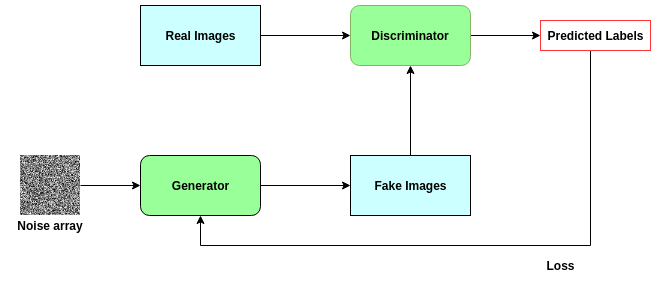

## <span style="color: #3CA1D5;">Discriminator and Generator Architecture</span>

#### <span style="color: #3CA1D5;">Discriminator (build_discriminator):
- The `build_discriminator` function defines the architecture of the discriminator in the GAN. It takes an image as input and outputs a binary classification result (real or fake).
- The model uses a series of convolutional layers with batch normalization and LeakyReLU activation functions to extract features from the input image.
- The final layer provides a binary classification using the sigmoid activation function, indicating the likelihood of the input being a real image.
- This architecture is designed to distinguish real images from generated (fake) ones.

#### <span style="color: #3CA1D5;">Generator (build_generator):
- The `build_generator` function defines the architecture of the generator in the GAN. It takes a random noise vector (latent space) as input and generates images.
- The model uses a series of transposed convolutional layers with batch normalization and ReLU activation functions to transform the latent space into an image.
- The final layer uses the hyperbolic tangent (tanh) activation function to ensure that the generated image has pixel values in the range [-1, 1].
- This architecture is responsible for creating artificial images that aim to resemble real images.

These functions establish the neural network architectures for the discriminator and generator, key components in the GAN framework.

In [3]:
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Input(shape=(image_size, image_size, 3)),
        layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),
        
        layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),
        
        layers.Conv2D(256, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),
        
        layers.Conv2D(512, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(0.2),
        
        layers.Conv2D(1, (4, 4), padding='valid', use_bias=False),
        layers.Flatten(),
        layers.Activation('sigmoid')
    ])
    return model

In [4]:
def build_generator():
    model = tf.keras.Sequential([
        layers.Input(shape=(latent_size,)),
        layers.Reshape((1, 1, latent_size)),
        
        layers.Conv2DTranspose(512, (4, 4), strides=(1, 1), padding='valid', use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),
        
        layers.Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),
        
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),
        
        layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.ReLU(),
        
        layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', use_bias=False),
        layers.Activation('tanh')
    ])
    return model

In [5]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3072      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131072    
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 128)      512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0

In [6]:
generator = build_generator()
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1, 1, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 4, 4, 512)        1048576   
 nspose)                                                         
                                                                 
 batch_normalization_4 (Batc  (None, 4, 4, 512)        2048      
 hNormalization)                                                 
                                                                 
 re_lu (ReLU)                (None, 4, 4, 512)         0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 8, 8, 256)        2097152   
 ranspose)                                                       
                                                      

## <span style="color: #3CA1D5;">Loss Function

- `cross_entropy`: This variable represents the binary cross-entropy loss function, which is a commonly used loss function for binary classification tasks. In the context of a Generative Adversarial Network (GAN), it is used to calculate the loss for both the discriminator and generator.
- Binary cross-entropy measures the dissimilarity between the true (ground truth) labels and the predicted values. In the discriminator, it quantifies the difference between the discriminator's predictions for real and fake images, and in the generator, it assesses how well the generator can fool the discriminator.
- Using this loss function is crucial for training the GAN to optimize the discriminator and generator performance.

The `cross_entropy` variable is a fundamental component in GAN training, as it quantifies the quality of generated images and the discriminator's ability to distinguish between real and fake data.


In [7]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()

## <span style="color: #3CA1D5;">Discriminator and Generator Loss Functions

#### <span style="color: #3CA1D5;">Discriminator Loss (discriminator_loss):
- The `discriminator_loss` function calculates the loss for the discriminator in the GAN. It measures the dissimilarity between the predictions for real and fake images and sums them up. Real images are labeled as ones, and fake images as zeros.
- This loss function uses the binary cross-entropy loss to compute the difference between the true labels and the discriminator's predictions.

#### <span style="color: #3CA1D5;">Generator Loss (generator_loss):
- The `generator_loss` function calculates the loss for the generator in the GAN. It assesses how well the generator can create fake images that the discriminator classifies as real.
- Similar to the discriminator loss, it also uses the binary cross-entropy loss, with the target label being ones (indicating the goal of generating realistic images).

#### <span style="color: #3CA1D5;">Optimizers (generator_optimizer and discriminator_optimizer):
- The `generator_optimizer` and `discriminator_optimizer` are instances of the Adam optimizer, used to update the weights of the generator and discriminator networks during training.
- The `lr` parameter is the learning rate(=0.0002), which controls the step size for weight updates. The `beta_1` parameter (0.5 in this case) influences the exponential decay rate for the first moment estimates.
- These optimizers are critical for adjusting the model weights to minimize the respective loss functions.

These components collectively manage the loss calculations and optimization procedures for the discriminator and generator in the GAN training process.


In [8]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [9]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [10]:
generator_optimizer = tf.keras.optimizers.Adam(lr, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(lr, beta_1=0.5)

## <span style="color: #3CA1D5;">GAN Training Step

- The `train_step` function represents a single training step for the Generative Adversarial Network (GAN). This step is a fundamental part of GAN training, where both the generator and discriminator networks are updated.
- The function accepts a batch of real images (`images`) as input, which will be used for training.
- It generates random noise (`noise`) from a normal distribution to serve as input to the generator.

Within the training step:
- The generator generates fake images (`generated_images`) using the random noise and is executed in the `gen_tape` context.
- The discriminator processes both the real and fake images (`real_output` and `fake_output`) in the `disc_tape` context.

- `gen_loss` is calculated using the `generator_loss` function, measuring how well the generator can deceive the discriminator.
- `disc_loss` is calculated using the `discriminator_loss` function, quantifying the ability of the discriminator to distinguish between real and fake images.

- Gradients of the generator and discriminator losses are computed with respect to their respective trainable variables.
- These gradients are then used to update the weights of the generator and discriminator networks through the `generator_optimizer` and `discriminator_optimizer`.

This `train_step` function encapsulates the core training process of the GAN, where the generator aims to generate realistic images, and the discriminator learns to distinguish between real and fake data.


In [11]:
@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, latent_size])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

## <span style="color: #3CA1D5;">Dataset Loading and Preprocessing

- The code loads and preprocesses the dataset that will be used for training the Generative Adversarial Network (GAN).
- `data_dir` should be replaced with the path to the directory containing the dataset (e.g., anime face images).

#### <span style="color: #3CA1D5;">Loading the Dataset:
- The `tf.keras.utils.image_dataset_from_directory` function is used to load the dataset from the specified directory.
- It resizes the images to the `image_size` (64x64 pixels) and forms mini-batches of size `batch_size`. The `label_mode` is set to `None` because this is an unsupervised GAN training.

#### <span style="color: #3CA1D5;">Preprocessing the Dataset:
- After loading, the dataset goes through a preprocessing step to make the pixel values compatible with the GAN architecture.
- It scales the pixel values from the range [0, 255] to the range [-1, 1] by subtracting 127.5 and dividing by 127.5.
- This transformation ensures that the pixel values are centered around zero, which is essential for GAN training.

The loaded and preprocessed dataset is then used for training the GAN, with real images used to train the discriminator and fake images generated by the generator.

In [12]:
data_dir = '../input/animefacedataset/'

In [13]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    image_size=(image_size, image_size), 
    batch_size=batch_size, 
    label_mode=None
)
train_dataset = train_dataset.map(lambda x: (x - 127.5) / 127.5)

Found 63565 files belonging to 1 classes.


## <span style="color: #3CA1D5;">GAN Training Loop

- The code represents the training loop for the Generative Adversarial Network (GAN) over a specified number of `epochs`.
- During each epoch, the GAN goes through the entire dataset using mini-batches of images.

### <span style="color: #3CA1D5;">Training Steps:
- For each epoch, the GAN iterates through the `train_dataset`, which contains preprocessed real images.
- The `train_step` function is called for each mini-batch of real images to update the generator and discriminator.
- This involves calculating the generator and discriminator losses, computing gradients, and optimizing the model weights using the specified optimizers.

The training loop is the core of GAN training, where the generator learns to generate realistic images that can fool the discriminator, and the discriminator improves its ability to distinguish real from fake images. This process continues for the specified number of epochs, leading to the refinement of both the generator and discriminator models.

In [14]:
for epoch in range(epochs):
    for image_batch in train_dataset:
        train_step(image_batch)

## <span style="color: #3CA1D5;">Sample Image Generation

- This code snippet demonstrates the process of generating sample images using the trained generator network.
- It's common practice to inspect the generator's performance by creating synthetic images.

### <span style="color: #3CA1D5;">Steps for Generating Sample Images:
1. `num_samples` specifies the number of sample images to generate. In this case, `9` samples are generated.
2. Random noise vectors of size `latent_size` are generated using `tf.random.normal`. These vectors serve as input to the generator.
3. The generator is used to generate images from the random noise vectors (`sample_noise`).
4. The generated images are denormalized by applying the transformation `0.5 * sample_images + 0.5`. This step brings the pixel values from the range [-1, 1] back to [0, 1].
5. To ensure that pixel values are within the valid range [0, 1], the `np.clip` function is used. Any values outside this range are clipped to fall within it.

In [15]:
num_samples = 9
sample_noise = tf.random.normal([num_samples, latent_size])
sample_images = generator(sample_noise)
sample_images = 0.5 * sample_images + 0.5  # Denormalize
sample_images = np.clip(sample_images, 0, 1)  # Clip values to [0, 1]

## <span style="color: #3CA1D5;">Sample Image Visualization

- This code snippet is responsible for visualizing the sample images that were generated using the trained GAN's generator.
- The generated images are displayed in a grid format for easy visualization.

#### <span style="color: #3CA1D5;">Steps for Visualizing Sample Images:
1. A grid of subplots (3x3) is created using `plt.subplots` to accommodate the `num_samples` (9 in this case) generated images.
2. A loop iterates over each of the generated sample images.
3. For each sample, the image is displayed in its respective subplot within the grid. The `imshow` function is used for displaying the image, and axis labels are turned off with `axis('off')`.

The resulting grid of images allows users to visually inspect and assess the quality of the synthetic images generated by the GAN's generator.


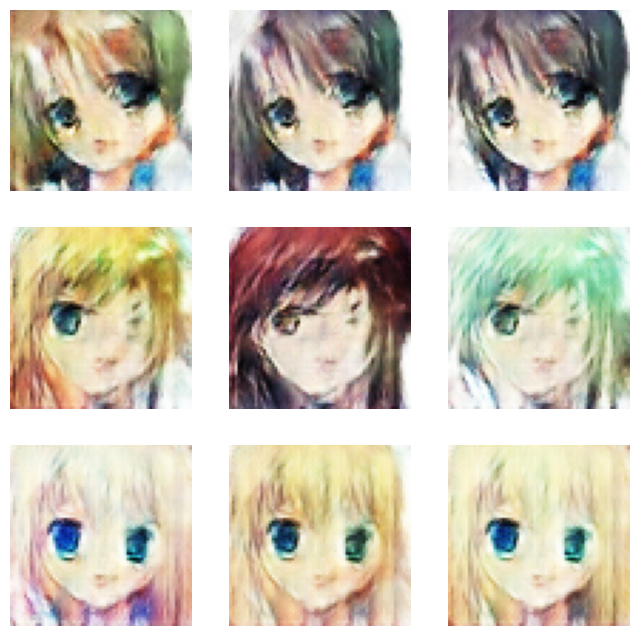

In [16]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
for i in range(num_samples):
    axs[i // 3, i % 3].imshow(sample_images[i])
    axs[i // 3, i % 3].axis('off')
plt.show()

## <span style="color: #3CA1D5;">Conclusion

In this notebook, we embarked on an exciting journey into the world of Generative Adversarial Networks (GANs) and the fascinating realm of anime character generation. Through this exploration, we've covered key aspects of GANs and their application in creating synthetic anime character images. 

Due to the limitations of runtime, we have conducted our experiments with a restricted number of **25** epochs. However, it's important to note that extending the number of epochs can often lead to improved results. With more training epochs, the models have the opportunity to converge more effectively, potentially resulting in better performance and more refined outcomes. We appreciate your understanding and encourage further exploration when resources permit to achieve even more promising results.


<div style="width: 100%; height: 100px; background-color: #EEC6D8; border: 3px solid #39B1A1; text-align: center; line-height: 100px; color: #3CA1D5; font-size: 24px; font-weight: bold; border-radius:6px;">
Thanks for paying attention to this notebook 🤍
</div>